In [ ]:
#https://github.com/Animesh1911/Tomato-Leaf-Disease-Detection/blob/main/tomato.py
#https://www.kaggle.com/datasets/noulam/tomato


In [ ]:
from google.colab import files
files.upload()  

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdshajibhossain","key":"945ab62fe216ca33495dd8f316cc1106"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#dataset - 

!kaggle datasets download -d noulam/tomato --unzip

100% 743M/743M [00:23<00:00, 40.5MB/s]
100% 743M/743M [00:23<00:00, 33.5MB/s]


In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
DATASET="/content/New Plant Diseases Dataset(Augmented)/train"   #path to train
DATASET2="/content/New Plant Diseases Dataset(Augmented)/valid"  #path to valid

In [ ]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight",
            "Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite",
            "Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

In [ ]:
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

In [ ]:
print(train_data[1][1])

0


In [ ]:
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [ ]:
print(len(train_data))
print(len(test_data))


18345
4585


In [ ]:
import random

random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
for lbl in train_data[:10]:
    print(lbl[1])

7
4
0
0
8
8
4
1
1
2


In [ ]:
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)


In [ ]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

len(X_train),len(y_train)

(18345, 18345)

In [ ]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)


In [ ]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

len(X_test),len(y_test)

(4585, 4585)

In [ ]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(18345, 64, 64, 3)

In [ ]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(4585, 64, 64, 3)

In [ ]:
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD',
       'SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Image Count')

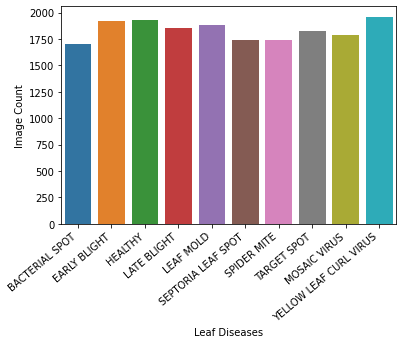

In [ ]:
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Image Count')

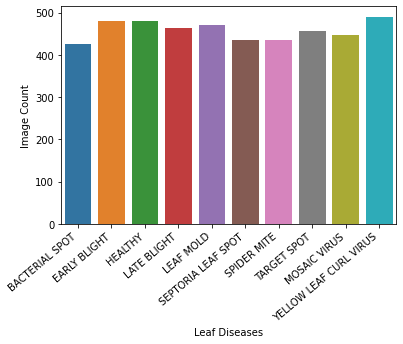

In [ ]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout


In [ ]:
one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test
# y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))


In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [ ]:
hist=classifier.fit(X_train,one_hot_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
115/115 [==============================] - 12s 27ms/step - loss: 1.9262 - accuracy: 0.2917 - val_loss: 1.4905 - val_accuracy: 0.4729
Epoch 2/10
115/115 [==============================] - 2s 22ms/step - loss: 1.1376 - accuracy: 0.6049 - val_loss: 0.8685 - val_accuracy: 0.7002
Epoch 3/10
115/115 [==============================] - 3s 22ms/step - loss: 0.7866 - accuracy: 0.7233 - val_loss: 0.6507 - val_accuracy: 0.7817
Epoch 4/10
115/115 [==============================] - 2s 22ms/step - loss: 0.5960 - accuracy: 0.7893 - val_loss: 0.5931 - val_accuracy: 0.7850
Epoch 5/10
115/115 [==============================] - 2s 21ms/step - loss: 0.4814 - accuracy: 0.8283 - val_loss: 0.4927 - val_accuracy: 0.8302
Epoch 6/10
115/115 [==============================] - 2s 21ms/step - loss: 0.4312 - accuracy: 0.8481 - val_loss: 0.4079 - val_accuracy: 0.8615
Epoch 7/10
115/115 [==============================] - 2s 22ms/step - loss: 0.3663 - accuracy: 0.8717 - val_loss: 0.3330 - val_accuracy: 0.887

In [ ]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

144/144 [==============================] - 1s 7ms/step - loss: 0.2588 - accuracy: 0.9088


(0.25878703594207764, 0.9088331460952759)

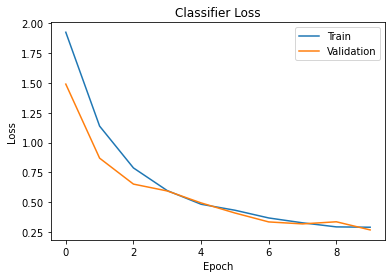

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

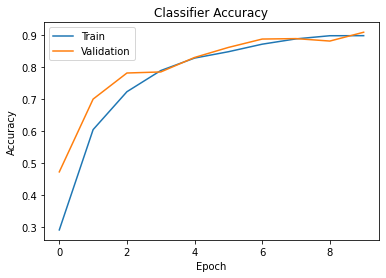

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# Classification Report


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
pred_ran=classifier.predict(X_test)


144/144 [==============================] - 1s 3ms/step


In [ ]:
pred_ran.shape


(4585, 10)

In [ ]:
print(one_hot_test)


[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(pred_ran)



[[4.07419720e-04 2.34026393e-05 9.98675048e-01 ... 2.03085547e-05
  2.20566392e-08 2.10614303e-06]
 [2.92242736e-01 3.48360452e-04 1.20146988e-05 ... 5.08309528e-03
  7.61719321e-06 1.92970470e-01]
 [1.77089496e-05 4.20940254e-04 3.99829636e-09 ... 3.53362666e-05
  2.01198986e-08 9.96592700e-01]
 ...
 [9.87805724e-01 4.21049725e-03 1.06763500e-05 ... 6.85785804e-03
  1.12056275e-08 3.41905281e-04]
 [1.63935920e-10 1.13956194e-04 3.31476963e-06 ... 1.30131701e-03
  9.98056591e-01 8.95007446e-08]
 [9.99137878e-01 5.88235562e-04 9.75269700e-07 ... 9.69650227e-06
  1.29682998e-09 2.10822382e-05]]


In [ ]:
pred_ran=(pred_ran>0.5)


In [ ]:
print(order)


['BACTERIAL SPOT', 'EARLY BLIGHT', 'HEALTHY', 'LATE BLIGHT', 'LEAF MOLD', 'SEPTORIA LEAF SPOT', 'SPIDER MITE', 'TARGET SPOT', 'MOSAIC VIRUS', 'YELLOW LEAF CURL VIRUS']


In [ ]:
print(classification_report(one_hot_test,pred_ran,target_names=order))


                        precision    recall  f1-score   support

        BACTERIAL SPOT       0.93      0.95      0.94       425
          EARLY BLIGHT       0.82      0.88      0.85       480
               HEALTHY       0.98      0.94      0.96       481
           LATE BLIGHT       0.94      0.85      0.89       463
             LEAF MOLD       0.94      0.92      0.93       470
    SEPTORIA LEAF SPOT       0.94      0.82      0.88       436
           SPIDER MITE       0.90      0.87      0.89       435
           TARGET SPOT       0.89      0.77      0.83       457
          MOSAIC VIRUS       0.99      0.96      0.97       448
YELLOW LEAF CURL VIRUS       0.96      0.95      0.96       490

             micro avg       0.93      0.89      0.91      4585
             macro avg       0.93      0.89      0.91      4585
          weighted avg       0.93      0.89      0.91      4585
           samples avg       0.89      0.89      0.89      4585



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm=confusion_matrix(one_hot_test.argmax(axis=1), pred_ran.argmax(axis=1))
print(cm)


[[409   9   0   1   0   0   0   0   0   6]
 [ 28 422   0  12   4   5   0   5   0   4]
 [  9   0 453   3   0   0   2  14   0   0]
 [ 24  36   3 394   2   1   1   0   0   2]
 [ 12   7   0   4 434  11   2   0   0   0]
 [ 35  11   1   3  15 358   3   5   3   2]
 [ 29   5   0   0   3   0 379  16   0   3]
 [ 53  18   4   0   1   4  24 352   1   0]
 [  9   1   0   0   1   0   4   4 429   0]
 [ 11   7   0   3   1   0   4   0   0 464]]


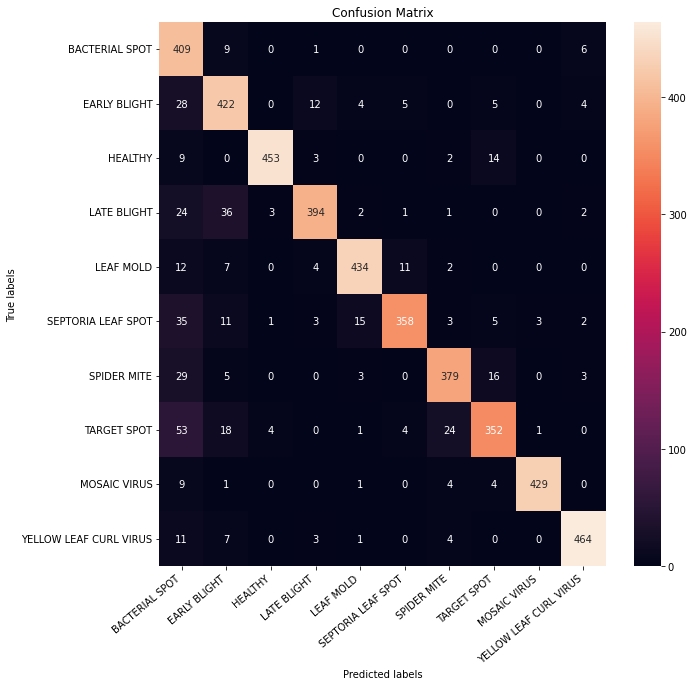

In [ ]:
import seaborn as sns
fig,ax= plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(order,rotation=40,ha='right'); ax.yaxis.set_ticklabels(order,rotation=360,ha='right');